In [55]:
fish_number =4
bn = 564
fn =630
ROI = 'heart'

<IPython.core.display.Javascript object>


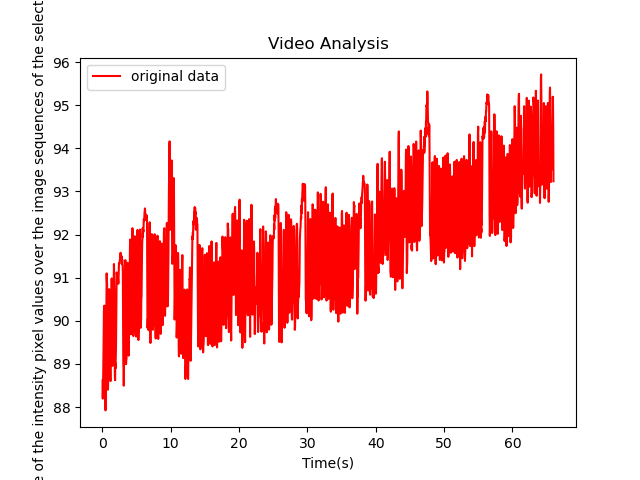

In [56]:
import matplotlib.pyplot as plt
import numpy as np 
%matplotlib notebook
f = open("average-564-630-peixe4_operculum.txt", "r")
s= f.read()
# print(s)
avg = list(s.split('\n'))
frame = []
time = []
video_dur = fn-bn
nr_frames= len(avg)-1

a = video_dur/nr_frames
fps = 30 #freq de amostragem 30Hz

for n in range(1,nr_frames+1):
    frame.append(n)
    time.append(a*n)
    avg[n-1] = float(avg[n-1])

avg =np.array(avg[:-1])

m = avg[:]
t= time[:]
plt.plot(t, m, 'r',label = 'original data')
plt.legend(loc='best')
plt.title('Video Analysis')
plt.xlabel('Time(s)')
plt.ylabel('Average of the intensity pixel values over the image sequences of the selected ROI')
plt.show()

In [35]:
filename= "peixe{nr}-{i}-{t}-video_original_{roi}.png".format(nr=fish_number, i = bn, t = fn, roi = ROI)
plt.savefig(filename)

# Filter data

In [57]:
import scipy.signal as signal
#Design the Butterworth filter
N  = 2                 # Filter order
Wn = [0.02, 0.2]       # Cutoff frequency
B, A = signal.butter(N, Wn,'bandpass', output='ba')
smooth_data = signal.filtfilt(B,A, m)


plt.plot(t,smooth_data,'k-', label='Filtered signal')
plt.legend(loc='best')
# plt.title('Video Analysis')
plt.xlabel('Time (s)')
plt.ylabel('Pixels average intensity of the selected ROI')
plt.show()

<IPython.core.display.Javascript object>

In [37]:
filename= "peixe{nr}-{i}-{t}-video_filt_{roi}.png".format(nr=fish_number, i = bn, t = fn, roi = ROI)
plt.savefig(filename)

# Find Peaks

[   7   18   29   40   50   64   84   99  110  121  131  142  153  191
  206  217  228  240  251  270  293  302  312  349  371  382  405  437
  448  458  468  478  488  498  516  526  538  550  570  581  591  600
  621  632  643  653  664  678  691  704  716  726  736  767  781  795
  805  816  826  838  852  885  901  911  921  933  943  956  967  978
  988  996 1008 1020 1030 1039 1049 1058 1068 1079 1092 1103 1112 1126
 1145 1161 1169 1181 1194 1205 1215 1224 1238 1248 1258 1270 1279 1288
 1298 1310 1322 1330 1341 1351 1364 1374 1395 1424 1456 1466 1475 1484
 1493 1503 1512 1523 1542 1552 1563 1573 1585 1595 1608 1626 1636 1646
 1669 1690 1704 1718 1729 1738 1749 1758 1776 1785 1796 1807 1825 1834
 1848 1859 1869 1877 1890 1900 1908 1923 1934 1943 1952 1962 1974]
153


<IPython.core.display.Javascript object>


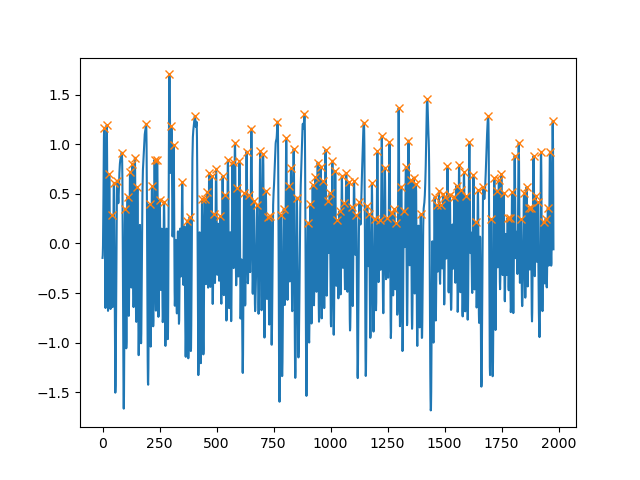

In [58]:
from scipy.signal import find_peaks
peaks, _ = find_peaks(smooth_data, height = 0.2, distance = 8, threshold = 0.0001) #retorna os indices dos picos 
print(peaks)
print(len(peaks))
plt.plot(smooth_data)
plt.plot(peaks, smooth_data[peaks], "x")
plt.show()

In [74]:
heart_beat = []

for n in range(len(peaks)-1):
    delta_t = time[peaks[n+1]]-time[peaks[n]]
    if delta_t < 7:
        f_min = 60/delta_t
        heart_beat.append(f_min)
        
    else:
        print("error")
        
#hb = np.around(heart_beat, 2)
#print(len(hb))
print(heart_beat)
print(round(np.mean(heart_beat),1))

[163.47107438016528, 163.4710743801653, 163.4710743801653, 179.81818181818178, 128.4415584415584, 89.90909090909095, 119.87878787878789, 163.4710743801651, 163.4710743801653, 179.81818181818215, 163.4710743801649, 163.4710743801653, 47.320574162679456, 119.87878787878778, 163.4710743801653, 163.4710743801653, 149.848484848485, 163.4710743801653, 94.64114832535871, 78.18181818181823, 199.7979797979794, 179.8181818181826, 48.59950859950859, 81.73553719008265, 163.4710743801653, 78.18181818181804, 56.1931818181819, 163.4710743801653, 179.81818181818167, 179.81818181818167, 179.81818181818167, 179.81818181818167, 179.81818181818167, 99.89898989899028, 179.81818181818167, 149.848484848485, 149.84848484848365, 89.9090909090913, 163.4710743801653, 179.81818181818167, 199.7979797979794, 85.6277056277056, 163.4710743801653, 163.4710743801653, 179.81818181818167, 163.4710743801653, 128.44155844155873, 138.3216783216774, 138.32167832167855, 149.848484848485, 179.81818181818167, 179.81818181818167

### Remove heart rate values outside 2 desvio padrão

In [81]:
up = 155 + 15
down = 155 - 15
length = len(heart_beat)-1
for element in heart_beat:
    if element > up:
        heart_beat.remove(element)
    if element < down:
        heart_beat.remove(element)
print(len(heart_beat))
print(heart_beat)
# print(down)

45
[163.47107438016528, 163.4710743801653, 163.4710743801653, 163.4710743801651, 163.4710743801653, 163.4710743801649, 163.4710743801653, 163.4710743801653, 163.4710743801653, 149.848484848485, 163.4710743801653, 163.4710743801653, 163.4710743801653, 149.848484848485, 149.84848484848365, 163.4710743801653, 163.4710743801653, 163.4710743801653, 163.4710743801653, 149.848484848485, 163.4710743801653, 149.848484848485, 149.848484848485, 163.4710743801669, 163.4710743801653, 149.84848484848365, 149.84848484848632, 163.4710743801653, 163.4710743801653, 149.84848484848632, 163.4710743801653, 149.84848484848365, 149.84848484848365, 149.84848484848632, 163.4710743801653, 163.4710743801653, 163.4710743801653, 149.84848484848365, 163.4710743801653, 163.4710743801653, 163.4710743801653, 163.4710743801653, 163.4710743801653, 163.4710743801653, 149.84848484848632]


# Calculo do erro dos sensores

159.23293541475365
6.377815336676378
[149.84848485 151.2107438  152.57300275 153.93526171 155.29752066
 156.65977961 158.02203857 159.38429752 160.74655647 162.10881543
 163.47107438]
Gaussiana 1: [  4.50077865 164.46408138  44.86565117]


<IPython.core.display.Javascript object>


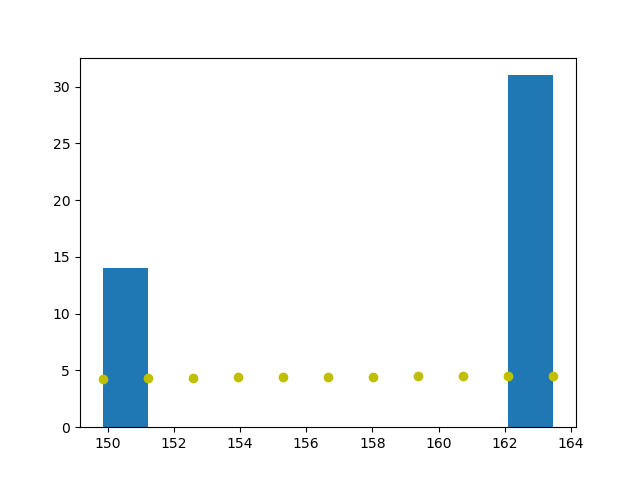

In [83]:
from scipy.stats import norm
import statistics
mean = statistics.mean(heart_beat)
sd = statistics.stdev(heart_beat)
print(mean)
print(sd)
from scipy.optimize import curve_fit
def gaussian(x, a, mean, sigma):
    return a*np.exp(-(x-mean)**2/(2*sigma**2))


hist, bin_edges = np.histogram(heart_beat, bins=10)

print(bin_edges)

best_vals, cov_vals = curve_fit(f=gaussian, xdata=bin_edges[-1:],ydata=hist, p0=[1, mean,sd])

print("Gaussiana 1: {}".format(best_vals))
plt.plot(bin_edges,gaussian(bin_edges, *best_vals),'yo',label='gaussian_sum')
plt.hist(heart_beat)
plt.show()

In [41]:
Y_raw =abs(np.fft.fft(avg))
Y_smooth = abs(np.fft.fft(smooth_data))
Ta = a
Fa=1/Ta
N=len(time)
x_fft=np.linspace(0.0,1.0/(2.0*Ta),N//2) #metade da fft
f_raw = 2.0/N * abs(Y_raw[:N//2]) #normalização e só temos metade da fft, porque a fft acaba por ser um espelho 
f_smooth = 2.0/N * abs(Y_smooth[:N//2])
n=len(x_fft)

# plt.plot(x_fft[1:],f_raw[1:], 'r', label = 'Raw data FFT')
plt.plot(x_fft[2:],f_smooth[2:],'b', label = 'Filtered data FFT')
plt.legend(loc='best')
plt.xlabel('Freq (Hz)')
plt.show()

In [42]:
filename= "peixe{nr}-{i}-{t}-gauss_{roi}.png".format(nr=fish_number, i = bn, t = fn, roi = ROI)
plt.savefig(filename)

## Gaussian Fit

In [43]:
#Gaussian function
def gaussian(x, a, mean, sigma):
    return a*np.exp(-(x-mean)**2/(2*sigma**2))

def gaussian_sum2(x, a, mean, sigma, a1, mean1, sigma1):
    return (a*np.exp(-(x-mean)**2/(2*sigma**2))) + (a1*np.exp(-(x-mean1)**2/(2*sigma1**2)))

def gaussian_sum3(x, a, mean, sigma, a1, mean1, sigma1, a2, mean2, sigma2):
    return (a*np.exp(-(x-mean)**2/(2*sigma**2))) + (a1*np.exp(-(x-mean1)**2/(2*sigma1**2))) + (a2*np.exp(-(x-mean2)**2/(2*sigma2**2)))

def gaussian_sum4(x, a, mean, sigma, a1, mean1, sigma1, a2, mean2, sigma2, a3, mean3, sigma3):
    return (a*np.exp(-(x-mean)**2/(2*sigma**2))) + (a1*np.exp(-(x-mean1)**2/(2*sigma1**2))) + (a2*np.exp(-(x-mean2)**2/(2*sigma2**2))) + (a3*np.exp(-(x-mean3)**2/(2*sigma3**2)))

#mean=sum(x_fft*f)/n
#sigma=sum(f*(x_fft-mean)**2)/n

In [44]:
from scipy import fftpack
from scipy.optimize import curve_fit
best_vals, cov_vals = curve_fit(f=gaussian, xdata=x_fft[10:], ydata = f_smooth[10:], p0=[0.05,2 ,1]) #best_vals = melhores valores para a, mean e sigma
print(best_vals)
      
      
y_fft1 = gaussian(x_fft,best_vals[0],best_vals[1],best_vals[2])
print("Gaussiana 1: {}".format(best_vals[1]))
# y_fft2 = gaussian(x_fft,best_vals[3],best_vals[4],best_vals[5])
# print("Gaussiana 2: {}".format(best_vals[4]))
# y_fft3 = gaussian(x_fft,best_vals[6],best_vals[7],best_vals[8])
# print("Gaussiana 3: {}".format(best_vals[7]))

# plt.plot(x_fft[2:],f_smooth[2:],'b+:',label='original smooth fft')
plt.plot(x_fft,gaussian(x_fft, *best_vals),'yo',label='gaussian_sum')
plt.legend(loc='best')
plt.xlabel('Freq (Hz)')
plt.show()

[ 0.20649164 -0.42345284  1.24683779]
Gaussiana 1: -0.4234528407738081


# Welch

In [45]:
f1, Pxx_den = signal.welch(avg[:],fps, nperseg=200, noverlap = 50)

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(f1, Pxx_den)
ax2.semilogy(f1, Pxx_den)
plt.xlabel('frequency [Hz]')
# plt.ylabel('PSD [V**2/Hz]')
plt.show()

<IPython.core.display.Javascript object>

In [46]:
filename= "peixe{nr}-{i}-{t}-welch_{roi}.png".format(nr=fish_number, i = bn, t = fn, roi = ROI)
plt.savefig(filename)